In [1]:
import numpy as np
import pandas as pd
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statistics import stdev, mean

# Reference: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

from ucimlrepo import fetch_ucirepo 
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
# data (as pandas dataframes) 
features = energy_efficiency.data.features 
targets = energy_efficiency.data.targets 
# metadata 
print(energy_efficiency.metadata) 
# variable information 
print(energy_efficiency.variables) 

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [2]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()
# print(x)

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
# print(X_train.shape)
# print(X_val.shape)
# print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl
    


Alpha: 0.0001
	Coefficients: [-5.93607418 -3.18681808  0.82751023 -3.51146274  7.53151385 -0.09784543
  2.52231577  0.27824188]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9241944128331967
	Validation accuracy (R2): 0.9089151454744471
	Testing accuracy (R2): 0.8948218354009656
Alpha: 0.001
	Coefficients: [-5.93451702 -3.18578276  0.82778904 -3.51058993  7.53186822 -0.09785126
  2.52230988  0.27823879]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9241944125357854
	Validation accuracy (R2): 0.9089146794641804
	Testing accuracy (R2): 0.8948208807883801
Alpha: 0.01
	Coefficients: [-5.91901124 -3.17547818  0.83056755 -3.50190542  7.53538495 -0.09790936
  2.52225109  0.27820804]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9241943830038307
	Validation accuracy (R2): 0.908909990070408
	Testing accuracy (R2): 0.8948113598709975
Alpha: 0.1
	Coefficients: [-5.77024842 -3.07711482  0.85744571 -3.41918077  7.56798826 -0.09847385
  2.52167256  0.27790827]
	In

Best alpha: 0.0001
Coefficients: [-5.93607418 -3.18681808  0.82751023 -3.51146274  7.53151385 -0.09784543
  2.52231577  0.27824188]
Intercept: 22.315260869565197
Last 5 values are most important: [6 1 3 0 4]
	Training accuracy (R2): 0.9241944128331967
	Validation accuracy (R2): 0.9089151454744471
	Testing accuracy (R2): 0.8948218354009656


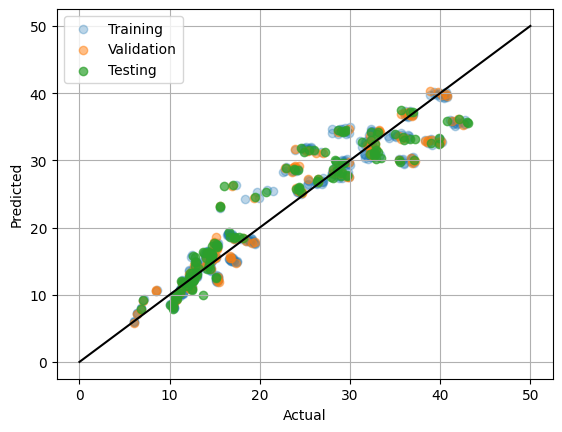

In [3]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

order = abs(np.array(best_mdl[1].coef_)).argsort()
print(f"Last 5 values are most important: {order[-5:]}")
# used chatgpt to show largest coefficients

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
train_R2 = best_mdl.score(X_train,y_train)
val_R2 = best_mdl.score(X_val,y_val)
print(f"\tTraining accuracy (R2): {train_R2}")
print(f"\tValidation accuracy (R2): {val_R2}")
print(f"\tTesting accuracy (R2): {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

# [30 pts] Split the samples into 60% Training, 20% Validation, and 20% Testing data at random.
Build a pipeline with Standard scaler then linear ridge regression. Set your own 10 different
choices of regularization, find the best choice that gives the highest accuracy on the validation
data, then make one final evaluation on the test data. What is the best model’s coefficients,
intercept, and its training, validation, and test accuracy?

Given the array

    [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

as the 10 choices of regularization, the model with alpha = 0.0001 yielded the best validation accuracy.


The best model's coefficients were

    [-5.93607418 -3.18681808  0.82751023 -3.51146274  7.53151385 -0.09784543 2.52231577  0.27824188]

with an intercept of

    22.315260869565197


The training, validation, and test accuracy were as follows.

	Training accuracy (R2): 0.9241944128331967
	Validation accuracy (R2): 0.9089151454744471
	Testing accuracy (R2): 0.8948218354009656

# [30 pts] Based on your answer in item (a), what are the top 5 features among X1 to X8? If you repeat the procedure above using only the 5 top features, what are the results?

We were able to obtain the coefficients with the highest magnitudes as containing the top 5 features among X1 to X8 as [X7 X2 X4 X1 X5]


In [8]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,order[-5:]].to_numpy(), targets.iloc[:, 0].to_numpy()
# there seems to be an issue when using [0,4,2,1,3] as column indices vs [0,1,2,3,4]. different ordering of features gives different results for the best alpha and R2 values. 

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
# print(X_train.shape)
# print(X_val.shape)
# print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

Alpha: 0.0
	Coefficients: [ 2.5832122  -1.54258264 -5.19469343 -5.92215893  7.51964217]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9233866032761144
	Validation accuracy (R2): 0.9080565071632828
	Testing accuracy (R2): 0.8936464561851626
Alpha: 0.0001
	Coefficients: [ 2.58321148 -1.54243652 -5.1946582  -5.92201316  7.51967935]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9233866032740017
	Validation accuracy (R2): 0.9080564617700793
	Testing accuracy (R2): 0.8936463650858438
Alpha: 0.001
	Coefficients: [ 2.58320495 -1.54112208 -5.19434135 -5.92070187  7.52001378]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9233866030650141
	Validation accuracy (R2): 0.9080560530532221
	Testing accuracy (R2): 0.8936455454822254
Alpha: 0.01
	Coefficients: [ 2.58313976 -1.52804337 -5.19119285 -5.90765194  7.52333442]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.923386582337704
	Validation accuracy (R2): 0.9080519484302597
	Testing accuracy (R2): 0.8936

Best alpha: 0.0
Coefficients: [ 2.5832122  -1.54258264 -5.19469343 -5.92215893  7.51964217]
Intercept: 22.315260869565197
	Training accuracy (R2): 0.9233866032761144
	Validation accuracy (R2): 0.9080565071632828
	Testing accuracy (R2): 0.8936464561851626


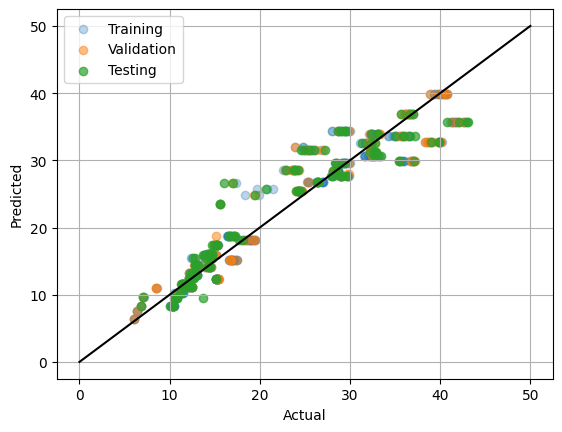

In [9]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
train_R2 = best_mdl.score(X_train,y_train)
val_R2 = best_mdl.score(X_val,y_val)
test_R2 = best_mdl.score(X_test,y_test)
print(f"\tTraining accuracy (R2): {train_R2}")
print(f"\tValidation accuracy (R2): {val_R2}")
print(f"\tTesting accuracy (R2): {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

The results of using the top 5 features are as follows:

    Best alpha: 0.0

    Coefficients: [ 2.5832122  -1.54258264 -5.19469343 -5.92215893  7.51964217]

    Intercept: 22.315260869565197
    
	Training accuracy (R2): 0.9233866032761144
	Validation accuracy (R2): 0.9080565071632828
	Testing accuracy (R2): 0.8936464561851626

# Based on your results for this Problem, what insights did you gain?

The lowest valued alpha yielded the best results in terms of predictive performance (train, val, test accuracies) for the full feature set model -> alpha = 0.0001.

We first considered alpha = 0 for the full feature set due to its highest validaiton accuracy, but it yielded a reduced accuracy for the reduced model. By removing 0 as an option and introducing 0.0001, we were able to get a higher accuracy and a different top 5 features. This relates to the lecture where a linear regression function without ridge regression could overfit the data and provide the wrong conclusions. For the reduced model, using alpha = 0 did not yield any anomalies when compared to 0.0001.

Using all features yielded training, validation, and test accuracies of 92.42%, 90.89%, 89.48%, respectively, while using only the 5 best features yielded 92.34%, 90.81%, 89.36% accuracies. Because the number of features were reduced, there comes a decrease in accuracy. This suggests that certain features may be a lesser or higher contributor to a model's performance. This explores a tradeoff in predictive performance and number of features.

It is also observed that training accuracy is consistently higher than in validation and testing, whereas the latter two have relatively close accuracies. This can be attributed to the split of 60% Training, 20% Validation, and 20% Testing data, where we have much more training data, with validation and testing data mainly used to test how the model can hold up.